## **Архитектура систем классификации**

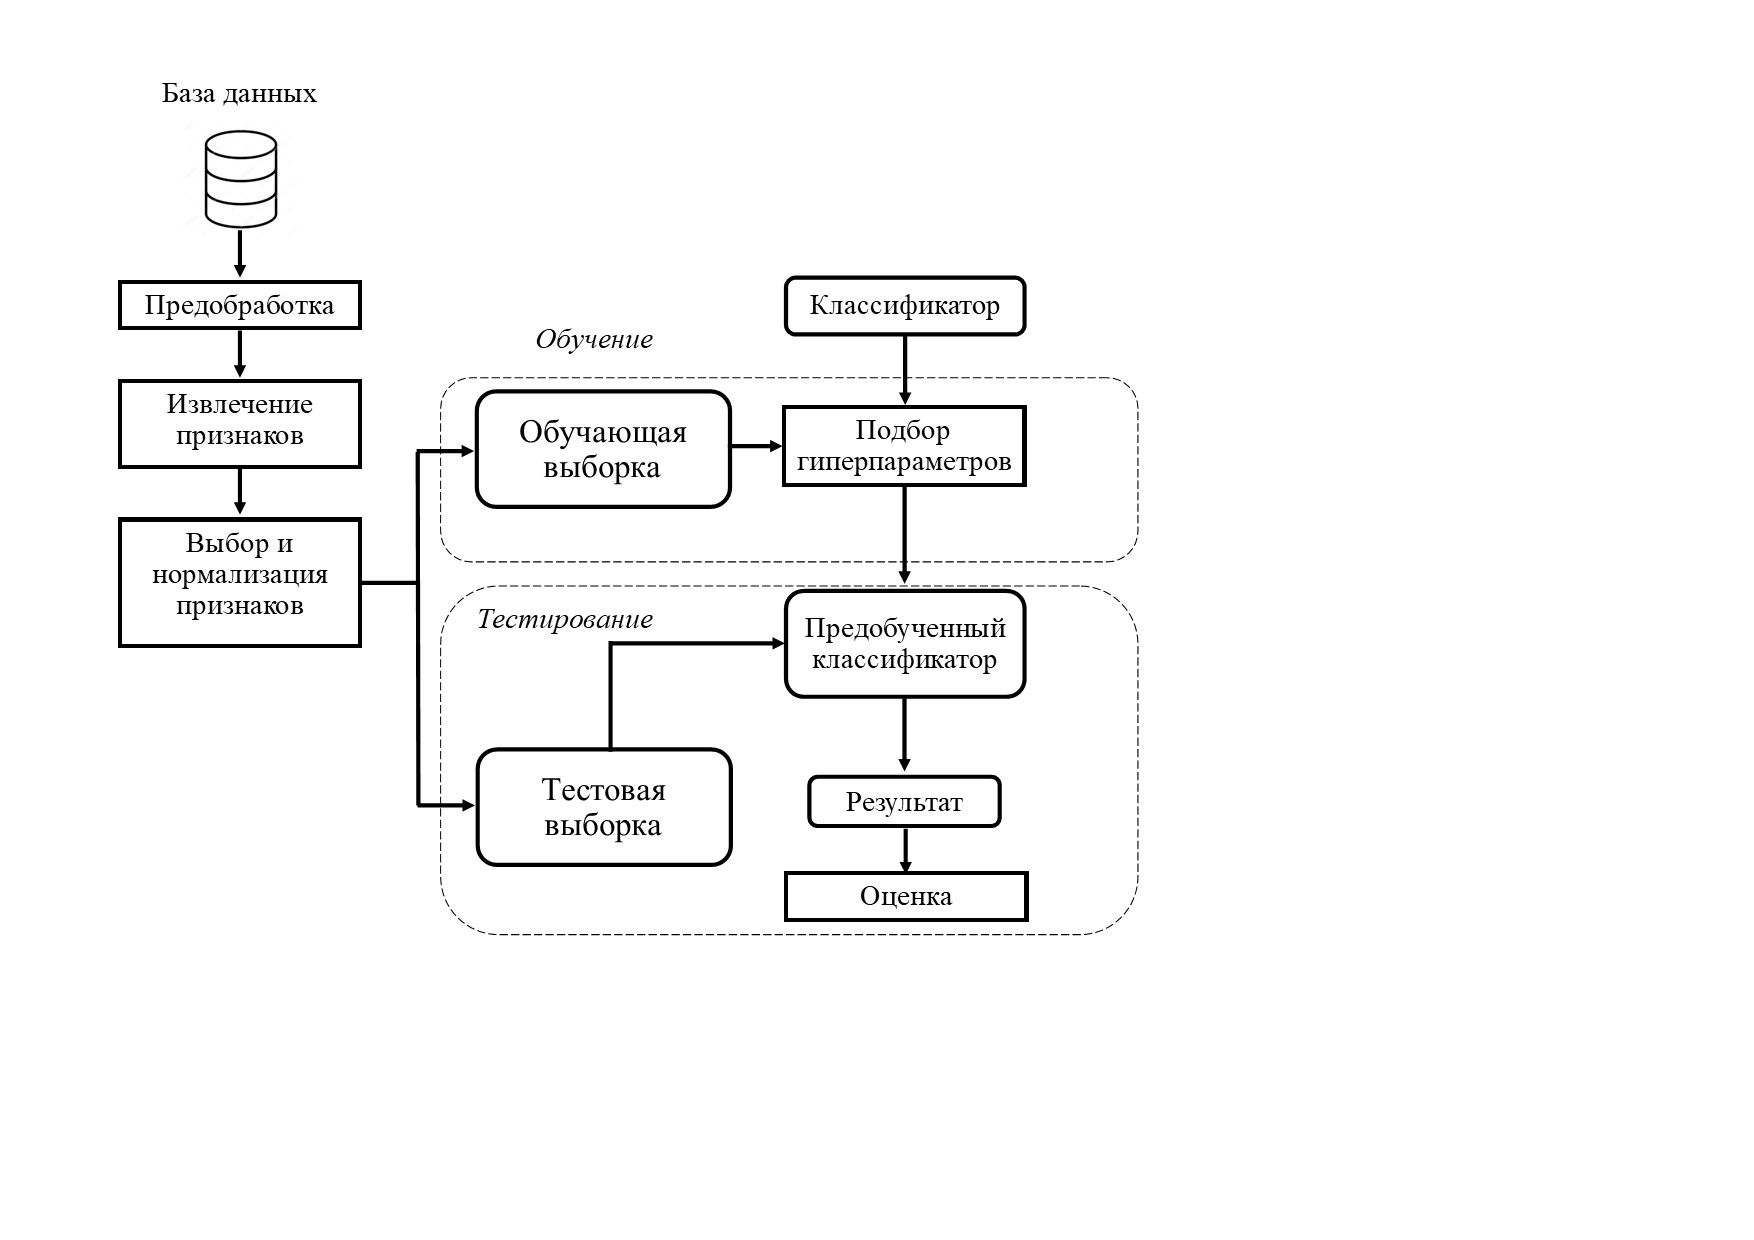

**Корпус данных (база данных)** - это упорядоченный набор структурированной информации.

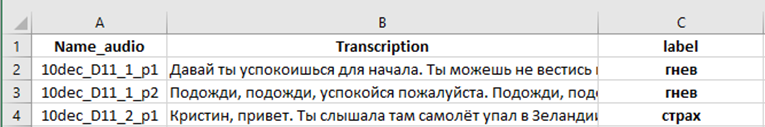


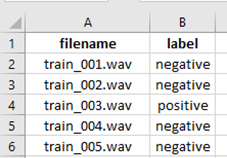


## Давайте подумаем, что из этого является корпусом данных?

https://audience.ahaslides.com/c89jsr6q2w 

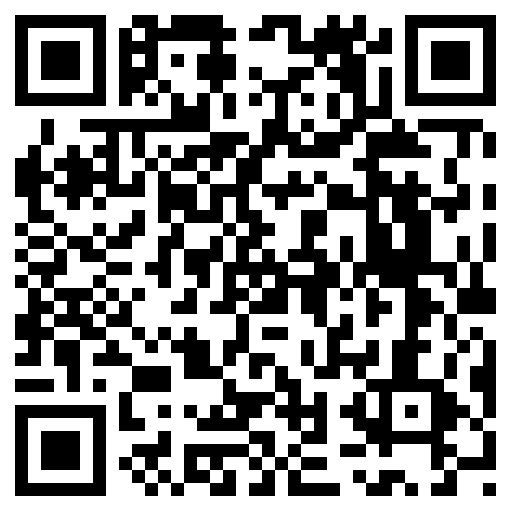

## **Библиотека pandas**

**Pandas** — главная библиотека в Python для работы с данными.

Ссылка на документацию
https://pandas.pydata.org/docs/user_guide/index.html#user-guide 

In [3]:
#установка библиотеки
#pip install pandas

In [4]:
#импортируем библиотеку
import pandas as pd

## **Series**

Одномерный массив с метками, способный хранить данные любого типа (целые числа, строки, числа с плавающей запятой, объекты Python и т. д.). Метки осей вместе называются индексом.

In [5]:
#создание объекта Series
s1 = pd.Series(range(5, 10))
s1

0    5
1    6
2    7
3    8
4    9
dtype: int64

In [6]:
#создание объекта Series
s2 = pd.Series(['Катя', 'Петя', 'Сережа', 'Коля', 'Вася'])
s2

0      Катя
1      Петя
2    Сережа
3      Коля
4      Вася
dtype: object

In [7]:
#создание объекта Series
s3 = pd.Series(['Катя', 'Петя', 'Сережа', 'Коля', 'Вася'], index=["a", "b", "c", "d", "e"])
s3

a      Катя
b      Петя
c    Сережа
d      Коля
e      Вася
dtype: object

In [8]:
#обращение к объекту Series по индексу
print(s1[0])
print(s2[len(s2)-1])
print(s3['a'])

5
Вася
Катя


In [9]:
#вывод слайса данных
print(s2[2:4])

2    Сережа
3      Коля
dtype: object


## **Dataframe**

Двумерная структура данных со столбцами потенциально разных типов. Воспринимается как таблица или наборе объектов Series.

In [10]:
#создание объекта DataFrame из словаря
df1 = pd.DataFrame({'A': [1, 2, 3, 4, 5, 6], 'B': [7, 8, 9, 10, 11, 12]})
df1

,A,B
0,1,7
1,2,8
2,3,9
3,4,10
4,5,11
5,6,12


In [11]:
#создание объекта DataFrame из объектов Series
df2 = pd.DataFrame({
    "A": pd.Series([1.0, 2.0, 3.0, 4.0, 5.0], index=["a", "b", "c", "d", "e"]),
    "B": pd.Series([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], index=["a", "b", "c", "d", "e", "f"]),
})
df2

,A,B
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,4.0,4.0
e,5.0,5.0
f,NaN,6.0


## **Просмотр содержимого DataFrame**

In [12]:
#вывод первых пяти строк
df1.head()

,A,B
0,1,7
1,2,8
2,3,9
3,4,10
4,5,11


In [13]:
#вывод первых двух строк
df1.head(2)

,A,B
0,1,7
1,2,8


In [14]:
#вывод последних пяти строк
df1.tail()

,A,B
1,2,8
2,3,9
3,4,10
4,5,11
5,6,12


*Как вывести последние 2 строки DataFrame?*

In [15]:
#вывод одного столбца
df1['A']

0    1
1    2
2    3
3    4
4    5
5    6
Name: A, dtype: int64

In [16]:
#вывод одной строки. Обращение по индексу
df1.loc[0]

A    1
B    7
Name: 0, dtype: int64

In [17]:
#вывод слайса строк. Обращение по индексу
df1.loc[0:3]

,A,B
0,1,7
1,2,8
2,3,9
3,4,10


In [18]:
#вывод по заданному условию
df1['A'] > 3

0    False
1    False
2    False
3     True
4     True
5     True
Name: A, dtype: bool

In [19]:
#вывод по заданному условию
df1[df1['A'] == 3]

,A,B
2,3,9


In [20]:
#вывод названий индексов DataFrame
print(df1.index)
print(df2.index)

RangeIndex(start=0, stop=6, step=1)
Index(['a', 'b', 'c', 'd', 'e', 'f'], dtype='object')


In [21]:
#вывод названий колонок DataFrame
df1.columns

Index(['A', 'B'], dtype='object')

## **Редактирование содержимого DataFrame**

In [22]:
import numpy as np

In [23]:
#добавление столбца
df1['C'] = np.zeros(6)
df1

,A,B,C
0,1,7,0.0
1,2,8,0.0
2,3,9,0.0
3,4,10,0.0
4,5,11,0.0
5,6,12,0.0


In [24]:
#добавление столбца
df1['D'] = df1['A'] + df1['B']
df1

,A,B,C,D
0,1,7,0.0,8
1,2,8,0.0,10
2,3,9,0.0,12
3,4,10,0.0,14
4,5,11,0.0,16
5,6,12,0.0,18


In [25]:
#удаление столбца DataFrame
df1 = df1.drop(columns = 'C')
df1

,A,B,D
0,1,7,8
1,2,8,10
2,3,9,12
3,4,10,14
4,5,11,16
5,6,12,18


In [26]:
#удаление строки DataFrame
df1 = df1.drop(1)
df1

,A,B,D
0,1,7,8
2,3,9,12
3,4,10,14
4,5,11,16
5,6,12,18


In [27]:
#востановление индексов DataFrame
df1 = df1.reset_index(drop=True)
df1

,A,B,D
0,1,7,8
1,3,9,12
2,4,10,14
3,5,11,16
4,6,12,18


## **Статистика в DataFrame**

In [28]:
#средняя по всем столбцами
df1.mean()

A     3.8
B     9.8
D    13.6
dtype: float64

## Мне необходимо вывести среднее значение по одному столбцу. Какую функцию я могу применить?


https://audience.ahaslides.com/c89jsr6q2w 

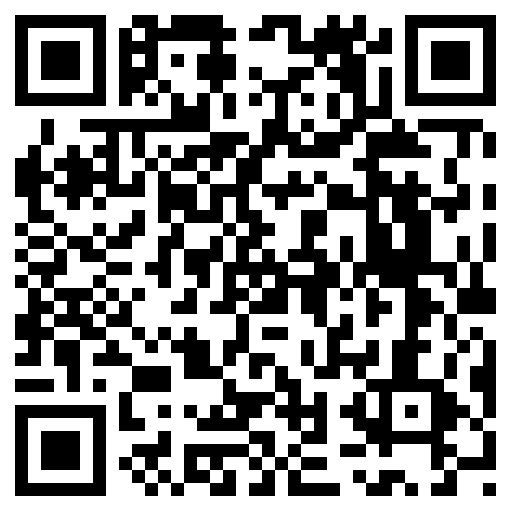

In [29]:
#средняя по всем столбцами
#df1['A'].mean()

In [30]:
#df1.mean()['A']

In [31]:
#df1.mean()[A]

In [32]:
#df1[A].mean()

In [33]:
#поиск минимального значения по столбцам
df1.min()

A    1
B    7
D    8
dtype: int64

In [34]:
#поиск максимального значения по столбцам
df1.max()

A     6
B    12
D    18
dtype: int64

In [35]:
#поиск минимального значения по строкам
df1.min(1)

0    1
1    3
2    4
3    5
4    6
dtype: int64

In [38]:
#вывод полной статистики
df1.describe()

,A,B,D
count,5.000000,5.000000,5.000000
mean,3.800000,9.800000,13.600000
std,1.923538,1.923538,3.847077
min,1.000000,7.000000,8.000000
25%,3.000000,9.000000,12.000000
50%,4.000000,10.000000,14.000000
75%,5.000000,11.000000,16.000000
max,6.000000,12.000000,18.000000


# **Работа с csv файлами**

## **Загрузить файл Способ 1**

вручную 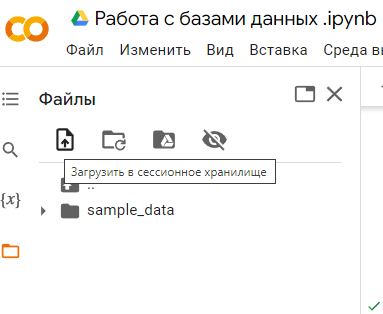


In [46]:
#Открыть данные с помощью DataFrame
db = pd.read_csv('/content/Manual_transcription clear with label.csv', sep = ';')
db.head()

,Name_audio,Transcription,label
0,10dec_D11_1_p1,Давай ты успокоишься для начала. Ты можешь не ...,гнев
1,10dec_D11_1_p2,"Подожди, подожди, успокойся пожалуйста. Подожд...",гнев
2,10dec_D11_2_p1,"Кристин, привет. Ты слышала там самолёт упал в...",страх
3,10dec_D11_2_p2,"Кристин, привет .. слушай .. Я боюсь лететь, т...",страх
4,10dec_D31_1,"Почему? Подожди... Ну подожди, ну как же, но м...",грусть


### **Загрузить файл Способ 2**

In [39]:
from google.colab import files

In [40]:
# создаем объект этого класса, применяем метод .upload()
uploaded = files.upload()

Saving Manual_transcription clear with label.csv to Manual_transcription clear with label.csv


In [44]:
db = pd.read_csv('/content/Manual_transcription clear with label.csv', sep = ';')

## **Загрузить файл Способ 3**

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
db = pd.read_csv('/content/drive/MyDrive/Manual_transcription clear with label.csv', sep = ';')

## **Сохранить файл**

In [49]:
db.to_csv('/content/result.csv', index=False)

# **ДОМАШНЕЕ ЗАДАНИЕ 1**

1. Загрузить файл Manual_transcription clear with label.csv с помощью DataFrame https://disk.yandex.ru/d/bYNPyKttMfR6OA 
2. Удалить колонку Name_audio.
3. *Переименовать колонку 'label' в 'Emotion'
4. Добавить колонку 'Sentiment'.
5. Заполниь колонку сентимент по принципу эмоции *гнев, грусть, отвращение, страх* - *негативный* сентимент; *радость, удивление* - *позитивный* сентимент, *нейтраль* -* нейтральное состояние*
6. Проверить все ли хорошо преобразовалось. (Возможно будет удобна функция np.unique)
7. Преобразовать эмоции в цифры. (от 0 до кол-ва эмоций). Записать в отдельную колонку 'Emotion digits'
8. Преобразовать сентимент в цифры. (от 0 до кол-ва сентиментов). Записать в отдельную колонку 'Sentiment digits'
9. Сохранить измененный файл в csv с новым названием
